> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Factors affect whether patients show up for scheduled appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

#from patsy import dmatrices
#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('data/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [12]:
df.shape

(110527, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
df.duplicated().sum()

0

In [16]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [3]:
# change colunm names
df.rename(columns = lambda x: x.strip().lower().replace('-', '_'), inplace=True)
df.rename(columns = {'scheduledday': 'scheduled_day'}, inplace=True)
df.rename(columns = {'appointmentday': 'appointment_day'}, inplace=True)
df.rename(columns = {'neighbourhood': 'hospital_location'}, inplace=True)
df.rename(columns = {'scholarship': 'welfare_enrolled'}, inplace=True)
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,hospital_location,welfare_enrolled,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# change data type from 'str' to 'datetime'
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [5]:
# change the value of 'no_show' column from 'yes / no' to '1 / 0'
df['showup'] = pd.get_dummies(df['no_show'])['No']

In [6]:
df['female'] = pd.get_dummies(df['gender'])['F']

In [7]:
# calculate waiting time
df['waiting_time'] = df['appointment_day'] + datetime.timedelta(hours=24) - df['scheduled_day']

In [8]:
# put waiting time into days
df['waiting_days'] = df['waiting_time']  / np.timedelta64(1, 'D')

In [9]:
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,hospital_location,welfare_enrolled,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,showup,female,waiting_time,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1,05:21:52,0.223519
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,07:51:33,0.327465
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,1,07:40:56,0.320093
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,1,06:30:29,0.271169
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,1,07:52:37,0.328206


In [23]:
df['hospital_location'].nunique()

81

In [10]:
df2 = df.drop(['patientid', 'appointmentid', 'gender', 'scheduled_day', 'appointment_day', 'no_show', 'waiting_time'], axis=1)
df2.head()

,age,hospital_location,welfare_enrolled,hipertension,diabetes,alcoholism,handcap,sms_received,showup,female,waiting_days
0,62,JARDIM DA PENHA,0,1,0,0,0,0,1,1,0.223519
1,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0.327465
2,62,MATA DA PRAIA,0,0,0,0,0,0,1,1,0.320093
3,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,1,0.271169
4,56,JARDIM DA PENHA,0,1,1,0,0,0,1,1,0.328206


(array([7.8183e+04, 2.2209e+04, 6.8250e+03, 2.1710e+03, 8.1500e+02,
        2.0500e+02, 3.8000e+01, 1.6000e+01, 2.0000e+01, 4.5000e+01]),
 array([ -5.57592593,  12.93715394,  31.4502338 ,  49.96331366,
         68.47639352,  86.98947338, 105.50255324, 124.0156331 ,
        142.52871296, 161.04179282, 179.55487269]),
 <a list of 10 Patch objects>)

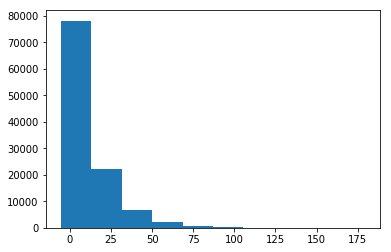

In [24]:
plt.hist(df['waiting_days'])

In [21]:
showup_welfare = df2.groupby('welfare_enrolled').mean()['showup']
showup_welfare

welfare_enrolled
0    0.801928
1    0.762637
Name: showup, dtype: float64

<BarContainer object of 2 artists>

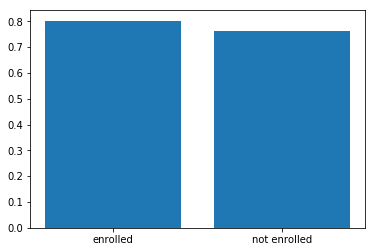

In [22]:
plt.bar([0,1], [0.801928, 0.762637], tick_label=['enrolled', 'not enrolled'])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1

### Discuss the relationship between waiting days and show up rates

In [11]:
df2['intercept'] = 1

In [12]:
lm = sm.Logit(df2['showup'], df2[['intercept', 'waiting_days']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 5


e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 showup   No. Observations:               110527
Model:                          Logit   Df Residuals:                   110525
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Dec 2018   Pseudo R-squ.:                     inf
Time:                        09:57:34   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.6907      0.010    173.790      0.000       1.672       1.710
waiting_days    -0.0258      0.000    -57.395      0.000      -0.027      -0.025
================================================================================
"""

In [37]:
1 / np.exp(results.params)

intercept       0.184398
waiting_days    1.026151
dtype: float64

**For each 1 day decrease in the waiting time, patient is 1.026 times likely to show up for their appointment (_P_ = 0.00 < 0.05).**

---

### Research Question 2  

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [13]:
lm = sm.Logit(df2['showup'], df2[['intercept', 'female', 'age', 'welfare_enrolled', 'sms_received', 'waiting_days']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\linjing\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 showup   No. Observations:               110527
Model:                          Logit   Df Residuals:                   110521
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Dec 2018   Pseudo R-squ.:                     inf
Time:                        09:57:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.5428      0.018     85.045      0.000       1.507       1.578
female              -0.0051      0.016     -0.309      0.757      -0.037       0.027
age                  0.0075      0.000     21.901      0.000       0.007       0.008
welfare_enrolled    -0.2340      0.025     -9.482      0.000      -0.282      -0.186
sms_received        -0.3524      0.017    -20.914      0.000      -0.385      -0.319
waiting_days        -0.0228      0.000    -47.012      0.000      -0.024      -0.022
====================================================================================
"""

In [15]:
np.exp(results.params)

intercept           4.677628
female              0.994950
age                 1.007502
welfare_enrolled    0.791335
sms_received        0.702990
waiting_days        0.977453
dtype: float64

In [16]:
1 / _

intercept           0.213784
female              1.005076
age                 0.992554
welfare_enrolled    1.263687
sms_received        1.422495
waiting_days        1.023067
dtype: float64

### Result Analysis

**Gender** does not have a significant effect on the show up rate (_P_ = 0.757 > 0.05)

For every 1 year increase in **age**, the show up rate is 1.01 times as likely holding all else constant (_P_ = 0.00 < 0.05).

For every 1 day decrease in **waiting time**, the show up rate is 1.02 times as likely holding all else constant (_P_ = 0.00 < 0.05).

If patients receive **SMS**, the show up rate is 1.42 times than not receving SMS, holding all else constant (_P_ = 0.00 < 0.05).

The show up rate of patients enrolled in **Brasilian welfare program** Bolsa Família is 1.26 times more than those who were not enrolled, holding all else constant (_P_ = 0.00 < 0.05).


Thus, receiving SMS or welfare is more important for predicting if a patient will show up for their scheduled appointment. 

---

### Confusion Matrix

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [32]:
y = df2['showup']
x = df[['welfare_enrolled', 'sms_received']]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=42)

In [34]:
log_mod = LogisticRegression()

In [35]:
log_mod.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_predicts = log_mod.predict(x_test)

In [37]:
precision_score(y_test, y_predicts)

0.7986971862842667

In [38]:
recall_score(y_test, y_predicts)

1.0

In [39]:
accuracy_score(y_test, y_predicts)

0.7986971862842667

In [40]:
confusion_matrix(y_test, y_predicts)

array([[   0, 2225],
       [   0, 8828]], dtype=int64)

In [47]:
precision_score(y_test, y_predicts)

0.7987018923119115

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!